# Valores dos experimentos

1. [Experimento 1](./teste_01_T100ms.txt)
    * $K_p = 1$;
    * $K_i = 0.1$;
    * $K_d = 0.00$;
    * $T = 100 ms$.

2. [Experimento 2](./teste_02_T100ms.txt)
    * $K_p = 0.5$;
    * $K_i = 0.1$;
    * $K_d = 0.10$;
    * $T = 100 ms$.

3. [Experimento 3](./teste_03_T100ms.txt)
    * $K_p = 0.8$;
    * $K_i = 0.0$;
    * $K_d = 0.0$;
    * $T = 100 ms$.

4. [Experimento 4](./teste_04_T100ms.txt)
    * $K_p = 1.0$;
    * $K_i = 0.5$;
    * $K_d = 0.3$;
    * $T = 100 ms$.

5. [Experimento 5](./teste_05_T85ms.txt)
    * $K_p = 0.3$;
    * $K_i = 1.0$;
    * $K_d = 0.0$;
    * $T = 85 ms$.

6. [Experimento 6](./teste_06_T70ms.txt)
    * $K_p = 0.3$;
    * $K_i = 1.0$;
    * $K_d = 0.0$;
    * $T = 70 ms$.

7. [Experimento 7](./teste_07_T10ms.txt)
    * $K_p = 0.3$;
    * $K_i = 1.0$;
    * $K_d = 0.0$;
    * $T = 10 ms$.

8. [Experimento 8](./teste_08_T10ms.txt)
    * $K_p = 0.3$;
    * $K_i = 1.0$;
    * $K_d = 0.3$;
    * $T = 10 ms$.

9. [Experimento 9](./teste_09_T10ms.txt)
    * $K_p = 0.3$;
    * $K_i = 1.0$;
    * $K_d = 0.1$;
    * $T = 10 ms$.

10. [Experimento 10](./teste_10_T100ms.txt)
    * $K_p = 0.3$;
    * $K_i = 1.0$;
    * $K_d = 0.1$;
    * $T = 100 ms$.

11. [Experimento 11](./teste_11_T100ms.txt)
    * $K_p = 1.0$;
    * $K_i = 2.0$;
    * $K_d = 0.0$;
    * $T = 100 ms$.

13. [Experimento 13](./teste_13_T100ms.txt)
    * $K_p = 0.3$;
    * $K_i = 1.0$;
    * $K_d = 0.0$;
    * $T = 100 ms$.

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import os

PATH = os.getcwd()
print(PATH)

print(os.listdir())

TextFile = f"./degrau/teste_11_T100ms.txt"
print(TextFile)

data = np.loadtxt(TextFile)

tempo = data[:, 0]
rpm = data[:,1]
setpoint = data[:,2]
erro = data[:,3]
acaoP = data[:,4]
acaoI = data[:,5]
acaoD = data[:,6]
sinal = data[:,7]

/home/andre/Documents/Git/CONTROLE_INTELIGENTE_EGM0019/Experimentos/MalhaFechada
['seguidor.ipynb', 'degrau.ipynb', 'seguindo_a_referencia', 'img', 'degrau']
./degrau/teste_11_T100ms.txt


In [ ]:
file = np.loadtxt(f"./degrau/teste_03_T{100}ms.txt")
teste_P_3 = file[:,1]
tempo_P3 = file[:, 0]

file = np.loadtxt(f"./degrau/teste_02_T{100}ms.txt")
teste_PID_2 = file[:,1]
tempo_PID_2 = file[:, 0]

file = np.loadtxt(f"./degrau/teste_04_T{100}ms.txt")
teste_PID_4 = file[:,1]
tempo_PID_4 = file[:, 0]

file = np.loadtxt(f"./degrau/teste_10_T{100}ms.txt")
teste_PID_10 = file[:,1]
tempo_PID_10 = file[:, 0]

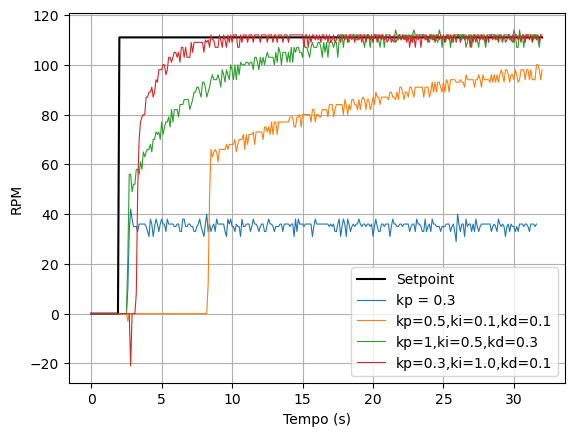

In [32]:
lenTempo = len(tempo)

plt.plot(tempo, setpoint, label="Setpoint", color="black")
plt.plot(tempo_P3[:lenTempo], teste_P_3[:lenTempo], label="kp = 0.3", linewidth=0.8)
plt.plot(tempo_PID_2[:lenTempo], teste_PID_2[:lenTempo], label="kp=0.5,ki=0.1,kd=0.1", linewidth=0.8)
plt.plot(tempo_PID_4[:lenTempo], teste_PID_4[:lenTempo], label="kp=1,ki=0.5,kd=0.3", linewidth=0.8)
plt.plot(tempo_PID_10[:lenTempo], teste_PID_10[:lenTempo], label="kp=0.3,ki=1.0,kd=0.1", linewidth=0.8)

plt.legend()
plt.grid()

plt.xlabel("Tempo (s)")
plt.ylabel("RPM")

plt.savefig("./img/TestesControladores.pdf")

plt.show()

## Diposição das colunas

**1.** Tempo (s)

**2.** RPM

**3.** Setpoint

**4.** erro

**5.** ação P

**6.** ação I

**7.** ação D

**8.** Sinal

In [6]:
def plotData(xdata, ylist, labellist=[],title="",xlabel="", ylabel="", saveImg = False, titleImg="Grafico"):
    for i in range(len(ylist)):
        plt.plot(xdata, ylist[i], label=labellist[i])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()

    if saveImg == True:
        plt.savefig(PATH + "/" + titleImg)

    plt.show()
    

In [7]:
RPMxTEMPO = "./img/PID_antiWindup_T100ms.png"
ACOES = "./img/AcoesControlador_antiWindup.pdf"
SINAL = "./img/SinalDeControle_antiWindup.pdf"

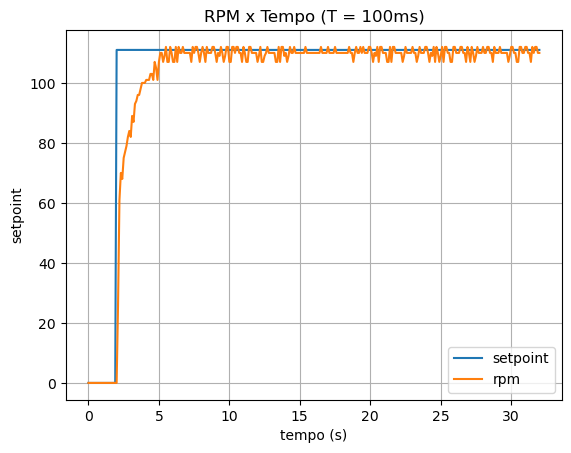

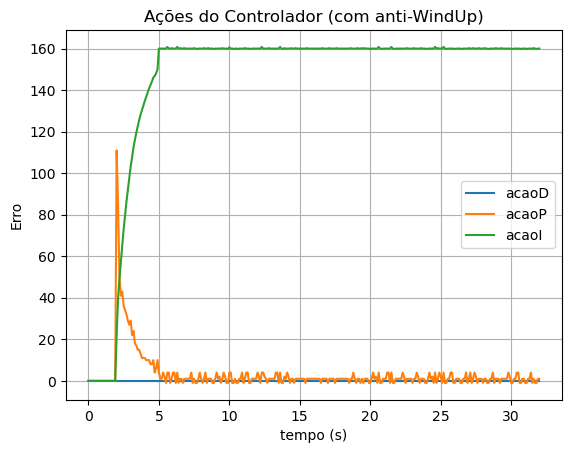

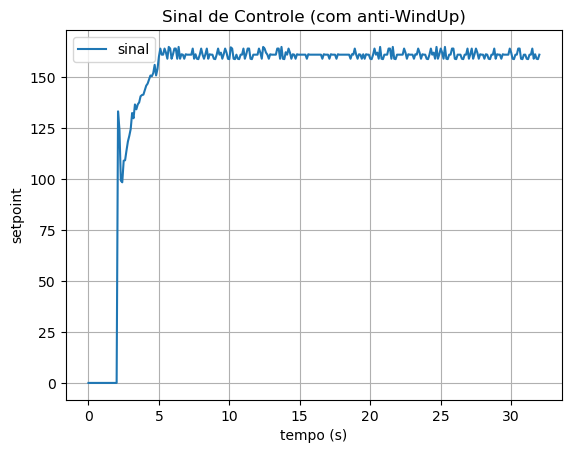

In [8]:
plotData(tempo, [setpoint, rpm],["setpoint", "rpm"],
         "RPM x Tempo (T = 100ms)",
         "tempo (s)", "setpoint",
         True, RPMxTEMPO)

plotData(tempo, [acaoD,acaoP,acaoI],["acaoD","acaoP","acaoI"],
         "Ações do Controlador (com anti-WindUp)",
         "tempo (s)", "Erro",
         True, ACOES)

plotData(tempo, [sinal],["sinal"],
         "Sinal de Controle (com anti-WindUp)",
         "tempo (s)", "setpoint",
         True, SINAL)